In [140]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
# Reading dataset from local
df=pd.read_csv("application_data.csv")
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
# Determining the structure of the datset
print(df.shape)
print(df.dtypes)

(307511, 122)
SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE           

In [143]:
pd.set_option('display.max_rows', 500)

## **DATA CLEANING**

In [144]:
#Counting columns with any NULL values
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
CNT_FAM_MEMBERS                      2
EXT_SOURCE_1                    173378
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_M

In [145]:
#Dropping the columns with more than 30% missing NULL as including them could lead to inaccurate results
drop_cols = df.columns[df.isnull().sum()/len(df.index) > 0.3]
drop_cols
df = df.drop(drop_cols,axis=1)

In [146]:
#Percentage of NULL values still available on columns
round(100*df.isnull().sum()/len(df.index),2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
C

In [147]:
# 13.7% rows have more than 3 missing values
# calculate the percentage
100*(len(df[df.isnull().sum(axis=1) > 3].index) / len(df.index))

13.77836890387661

**Thus, about 13.77% rows having any missing values. Let's remove these rows and count the number of missing values remaining.**

In [148]:
# retaining the rows having <= 3 Nas
df = df[df.isnull().sum(axis=1) <=3]

# look at the summary again
round(100*(df.isnull().sum()/len(df.index)),5)

SK_ID_CURR                     0.00000
TARGET                         0.00000
NAME_CONTRACT_TYPE             0.00000
CODE_GENDER                    0.00000
FLAG_OWN_CAR                   0.00000
FLAG_OWN_REALTY                0.00000
CNT_CHILDREN                   0.00000
AMT_INCOME_TOTAL               0.00000
AMT_CREDIT                     0.00000
AMT_ANNUITY                    0.00415
AMT_GOODS_PRICE                0.08750
NAME_TYPE_SUITE                0.44618
NAME_INCOME_TYPE               0.00000
NAME_EDUCATION_TYPE            0.00000
NAME_FAMILY_STATUS             0.00000
NAME_HOUSING_TYPE              0.00000
REGION_POPULATION_RELATIVE     0.00000
DAYS_BIRTH                     0.00000
DAYS_EMPLOYED                  0.00000
DAYS_REGISTRATION              0.00000
DAYS_ID_PUBLISH                0.00000
FLAG_MOBIL                     0.00000
FLAG_EMP_PHONE                 0.00000
FLAG_WORK_PHONE                0.00000
FLAG_CONT_MOBILE               0.00000
FLAG_PHONE               

In [149]:
# We will remove unwanted columns from this dataset , not important for our analysis

unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df.drop(labels=unwanted,axis=1,inplace=True)

In [150]:
#Columns OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE have
#0.32% Null values and EXT_SOURCE_2,EXT_SOURCE_3 have 0.20% Nulls 

df[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','EXT_SOURCE_2','EXT_SOURCE_3','AMT_GOODS_PRICE']].describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_GOODS_PRICE
count,265141.000000,265141.000000,265141.000000,265141.000000,264617.000000,245797.000000,2.649090e+05
mean,1.431970,0.143305,1.414987,0.099600,0.517577,0.510774,5.453992e+05
std,2.419112,0.446222,2.397903,0.361232,0.189623,0.194841,3.715383e+05
min,0.000000,0.000000,0.000000,0.000000,0.000001,0.000527,4.050000e+04
25%,0.000000,0.000000,0.000000,0.000000,0.399188,0.370650,2.385000e+05
50%,0.000000,0.000000,0.000000,0.000000,0.569042,0.535276,4.500000e+05
75%,2.000000,0.000000,2.000000,0.000000,0.664953,0.669057,6.885000e+05
max,348.000000,34.000000,344.000000,24.000000,0.855000,0.896010,4.050000e+06


**For columns AMT_ANNUITY,DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,EXT_SOURCE_3, we can replace the Nulls with mean
For columns OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE , we can replace the Nulls with median since difference between min and max is too much!, Outliers might be present.**

In [151]:
#Imputation using Median Values
df['OBS_30_CNT_SOCIAL_CIRCLE'] = df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_30_CNT_SOCIAL_CIRCLE'].median())
df['OBS_60_CNT_SOCIAL_CIRCLE'] = df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_60_CNT_SOCIAL_CIRCLE'].median())

#Imputation using Mean Values
df['DEF_30_CNT_SOCIAL_CIRCLE'] = df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(df['DEF_30_CNT_SOCIAL_CIRCLE'].mean())
df['DEF_60_CNT_SOCIAL_CIRCLE'] = df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(df['DEF_60_CNT_SOCIAL_CIRCLE'].mean())

df['EXT_SOURCE_3'] = df['EXT_SOURCE_3'].fillna(df['EXT_SOURCE_3'].mean())
df['EXT_SOURCE_2'] = df['EXT_SOURCE_2'].fillna(df['EXT_SOURCE_2'].mean())

df['AMT_GOODS_PRICE'] = df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].mean())

df['AMT_ANNUITY'] = df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].mean())

In [152]:
#Replacing the Null values in NAME_TYPE_SUITE column as Not Specified
df[['NAME_TYPE_SUITE']].describe()
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].replace(np.nan, 'Not Specified', regex=True)

In [153]:
# Casting all variable into numeric in the dataset
numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

df[numeric_columns]=df[numeric_columns].apply(pd.to_numeric)
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


### **Checking for outliers**

In [154]:
#Column AMT_ANNUITY Statistics
df['AMT_ANNUITY'].describe()


count    265141.000000
mean      27192.402861
std       14380.318421
min        1615.500000
25%       16654.500000
50%       24997.500000
75%       34749.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

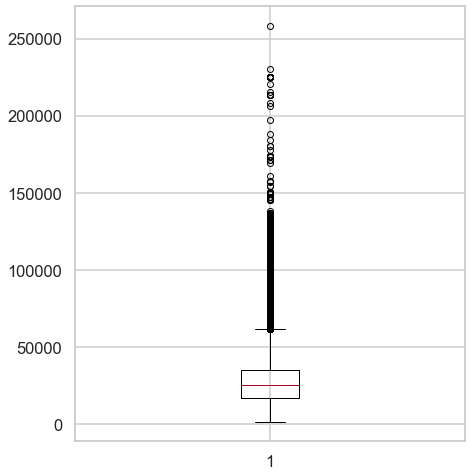

In [155]:
#As we can observe there are some outliers present in the column AMT_ANNUITY. Since , there are many outliers. 
#So, instead of replacing them we would bin them.
plt.boxplot(df["AMT_ANNUITY"])
plt.show()

##### Removing Outliers using IQR

In [156]:
df['AMT_ANNUITY'].quantile([0.5,0.7,0.9,0.95,0.99])

0.50    24997.5
0.70    32125.5
0.90    45954.0
0.95    53253.0
0.99    69754.5
Name: AMT_ANNUITY, dtype: float64

In [157]:
Q1=df['AMT_ANNUITY'].quantile(0.25)
Q3=df['AMT_ANNUITY'].quantile(0.75)

In [158]:
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)

16654.5
34749.0
18094.5


In [159]:
Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR
print(Lower_Whisker, Upper_Whisker)

-10487.25 61890.75


In [160]:
df = df[df['AMT_ANNUITY']< Upper_Whisker]


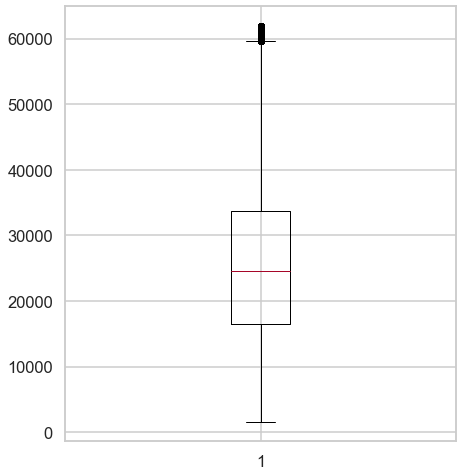

In [161]:
plt.boxplot(df["AMT_ANNUITY"])
plt.show()

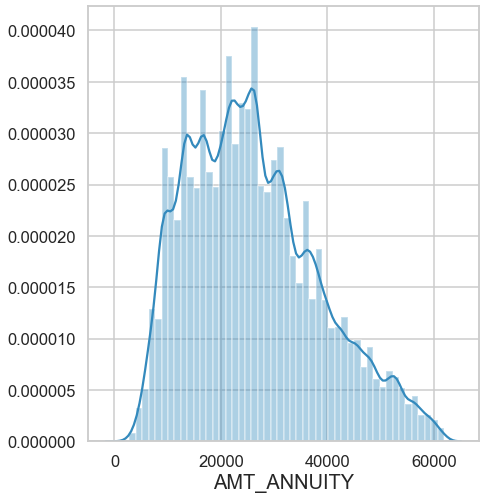

In [164]:
#Checking if the column df['AMT_ANNUITY'] follows a normal distribution so that we can apply a standard deviation method
sns.distplot(df['AMT_ANNUITY'])
plt.show()

In [165]:
#Looking for more outliers
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,259022.000000,259022.00000,259022.000000,2.590220e+05,2.590220e+05,259022.000000,2.590220e+05,259022.000000,259022.000000,259022.000000,...,259022.000000,259022.000000,259022.000000,259022.000000,259022.000000,259022.000000,259022.000000,259022.000000,259022.000000,259022.000000
mean,278118.776861,0.07824,0.422358,1.675323e+05,5.879082e+05,26073.667860,5.269486e+05,0.020662,-16114.444711,64098.528206,...,1.437971,0.144324,1.420922,0.100393,0.006366,0.007019,0.034248,0.265379,0.265275,1.906888
std,102831.942198,0.26855,0.725735,2.477346e+05,3.800580e+05,12236.595421,3.461565e+05,0.013500,4320.861447,141574.019169,...,2.425227,0.448169,2.403964,0.362928,0.083605,0.110823,0.204092,0.913197,0.798278,1.870633
min,100002.000000,0.00000,0.000000,2.610000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25201.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188962.250000,0.00000,0.000000,1.125000e+05,2.700000e+05,16456.500000,2.385000e+05,0.010006,-19726.000000,-2828.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278016.500000,0.00000,0.000000,1.485000e+05,5.099220e+05,24633.000000,4.500000e+05,0.018850,-15806.000000,-1253.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367174.750000,0.00000,1.000000,2.025000e+05,8.086500e+05,33723.000000,6.795000e+05,0.028663,-12552.000000,-296.000000,...,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.00000,19.000000,1.170000e+08,2.447937e+06,61888.500000,2.340000e+06,0.072508,-7489.000000,365243.000000,...,348.000000,34.000000,344.000000,24.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [166]:
#Statistical description of the column
df['DAYS_EMPLOYED'].describe()

count    259022.000000
mean      64098.528206
std      141574.019169
min      -17912.000000
25%       -2828.000000
50%       -1253.000000
75%        -296.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

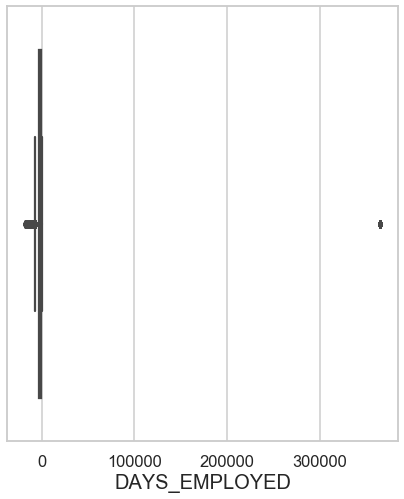

In [167]:

sns.boxplot(x=df['DAYS_EMPLOYED'])

In [168]:
Q1=df['DAYS_EMPLOYED'].quantile(0.25)
Q3=df['DAYS_EMPLOYED'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR
print(Lower_Whisker, Upper_Whisker)

-2828.0
-296.0
2532.0
-6626.0 3502.0


In [169]:
df = df[df['DAYS_EMPLOYED']< Upper_Whisker]

In [170]:
df = df[df['DAYS_EMPLOYED']> Lower_Whisker]

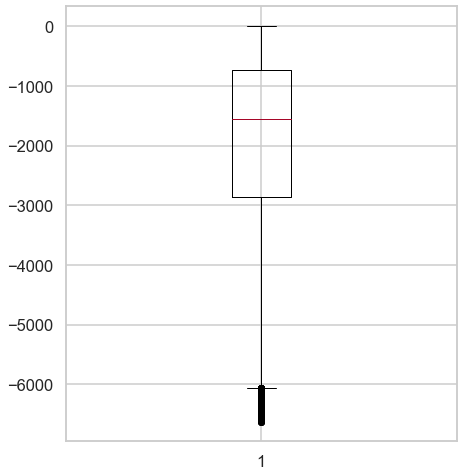

In [171]:
plt.boxplot(df["DAYS_EMPLOYED"])
plt.show()

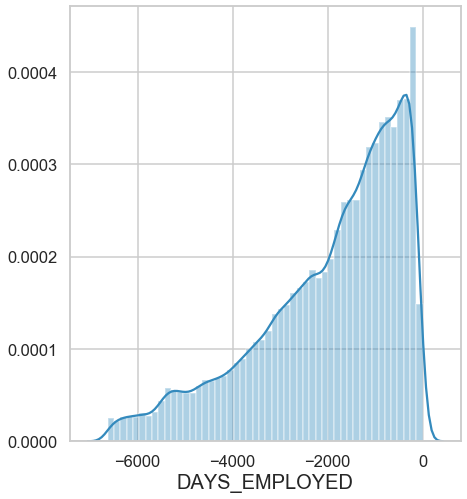

In [172]:
sns.distplot(df['DAYS_EMPLOYED'])
plt.show()

#### There are some columns where the value is mentioned as 'XNA' which means 'Not Available'. So we have to find the number of rows and columns and implement suitable techniques on them to fill those missing values or to delete them.

In [173]:
# Describing the Gender column to check the number of females and males
df['CODE_GENDER'].value_counts()

F      122587
M       75342
XNA         3
Name: CODE_GENDER, dtype: int64

In [174]:
#Converting XNA values to F since Females are in majority
df['CODE_GENDER'] = df['CODE_GENDER'].replace(to_replace ="XNA",value ="F")

In [175]:
df['CODE_GENDER'].value_counts()

F    122590
M     75342
Name: CODE_GENDER, dtype: int64

**So, for column 'ORGANIZATION_TYPE', we have total count of 307511 rows of which 55374 rows are having 'XNA' values. Which means 18% of the column is having this values. Hence if we drop the rows of total 55374, will not have any major impact on our dataset.**

In [176]:
# Hence, dropping the rows of total 55374 have 'XNA' values in the organization type column
df=df.drop(df.loc[df['ORGANIZATION_TYPE']=='XNA'].index)
df[df['ORGANIZATION_TYPE']=='XNA'].shape

(0, 42)

In [177]:
# Creating bins for income amount, so that plotting it would be easier

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df['AMT_INCOME_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [178]:
# Creating bins for Credit amount, so that plotting it would be easier

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

df['AMT_CREDIT_RANGE']=pd.cut(df['AMT_CREDIT'],bins=bins,labels=slots)

In [179]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)
target0_df=df.loc[df["TARGET"]==0]
target1_df=df.loc[df["TARGET"]==1]

In [180]:
target0_df.shape
print('Shape of Target0 is ',len(target0_df))
target1_df.shape
print('Shape of Target1 is ',len(target1_df))

Shape of Target0 is  180690
Shape of Target1 is  17242


In [181]:
# Calculating Imbalance percentage

round(len(target0_df)/len(target1_df),2)

10.48

##### The Imbalance ratio is 10.48

## Analysis

### Categorical Ordered Univariate Analysis for few columns

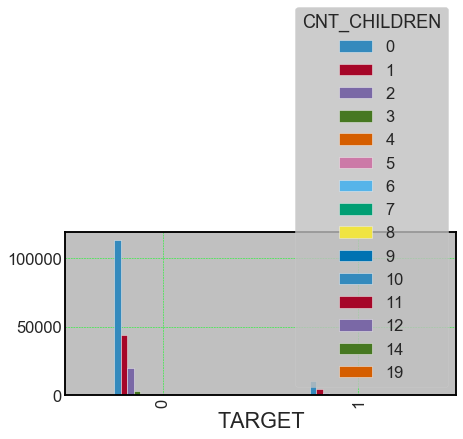

In [261]:
#We can observe that most of the people taking loans are more likely to have no child
pd.crosstab(df['TARGET'],df['CNT_CHILDREN']).plot.bar()
plt.grid(True, linewidth=0.5, color='#00ff11', linestyle='--')
plt.style.use("bmh")
plt.rcParams.update({"figure.figsize" : (7, 3),"axes.facecolor" : "#C0C0C0","axes.edgecolor":  "black"})

## Categorical Unordered Univariate Analysis

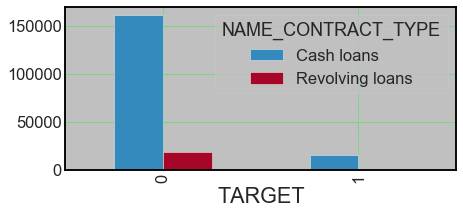

In [188]:
#We can observe that Cash Loans are more frequently available than Revolving loan
pd.crosstab(df['TARGET'],df['NAME_CONTRACT_TYPE']).plot.bar()
plt.grid(True, linewidth=0.5, color='#00ff11', linestyle='--')
plt.style.use("bmh")
plt.rcParams.update({"figure.figsize" : (6, 8),"axes.facecolor" : "#C0C0C0","axes.edgecolor":  "black"})

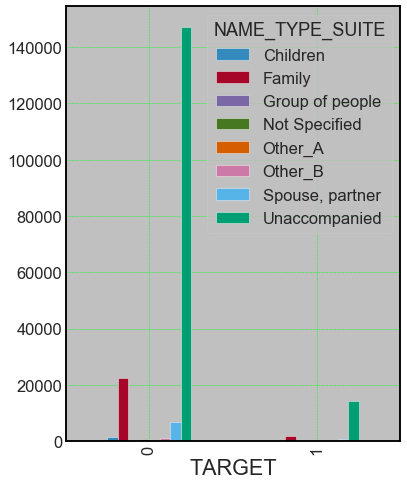

In [189]:
#We can observe that Unaccompained are more likely to take loans
pd.crosstab(df['TARGET'],df['NAME_TYPE_SUITE']).plot.bar()
plt.grid(True, linewidth=0.5, color='#00ff11', linestyle='--')
plt.style.use("bmh")
plt.rcParams.update({"figure.figsize" : (6, 8),"axes.facecolor" : "#C0C0C0","axes.edgecolor":  "black"})

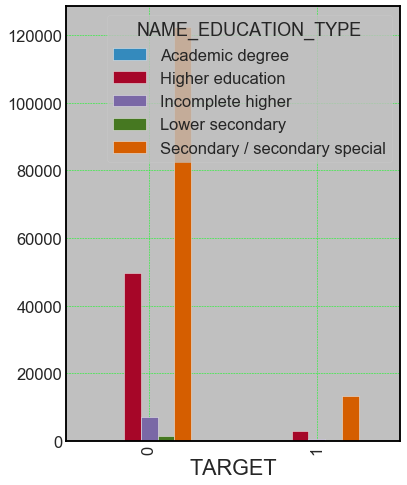

In [190]:
#We can observe that Secondary/secondary special are more likely to take loans
pd.crosstab(df['TARGET'],df['NAME_EDUCATION_TYPE']).plot.bar()
plt.grid(True, linewidth=0.5, color='#00ff11', linestyle='--')
plt.style.use("bmh")
plt.rcParams.update({"figure.figsize" : (12, 5),"axes.facecolor" : "#C0C0C0","axes.edgecolor":  "black"})

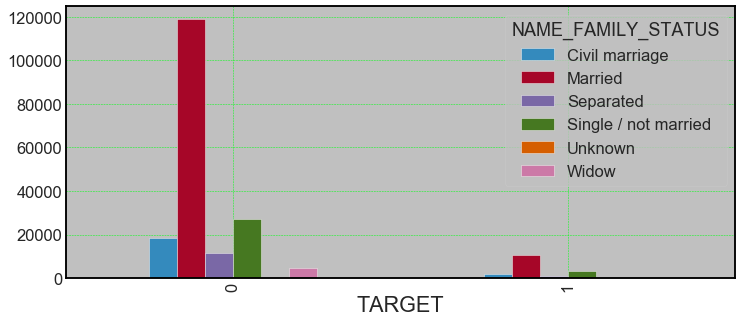

In [191]:
#We can observe that Married people are more likely to take loans 
pd.crosstab(df['TARGET'],df['NAME_FAMILY_STATUS']).plot.bar()
plt.grid(True, linewidth=0.5, color='#00ff11', linestyle='--')
plt.style.use("bmh")
plt.rcParams.update({"figure.figsize" : (7, 3),"axes.facecolor" : "#C0C0C0","axes.edgecolor":  "black"})

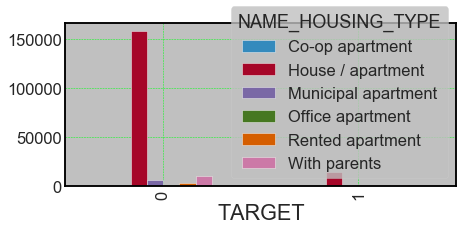

In [192]:
#We can observe that people living in House/Apartment are more likely to take loans 
pd.crosstab(df['TARGET'],df['NAME_HOUSING_TYPE']).plot.bar()
plt.grid(True, linewidth=0.5, color='#00ff11', linestyle='--')
plt.style.use("bmh")
plt.rcParams.update({"figure.figsize" : (7, 8),"axes.facecolor" : "#C0C0C0","axes.edgecolor":  "black"})

In [193]:
# Finding some correlation for numerical columns for both target 0 and 1 
target0_corr=target0_df.iloc[0:,2:]
target1_corr=target1_df.iloc[0:,2:]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')

In [194]:
# Now, plotting the above correlation with heat map as it is the best choice to visulaize
# figure size
def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70

# heatmap with a color map of choice
    sns.heatmap(data, cmap="RdYlGn",annot=False)
    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

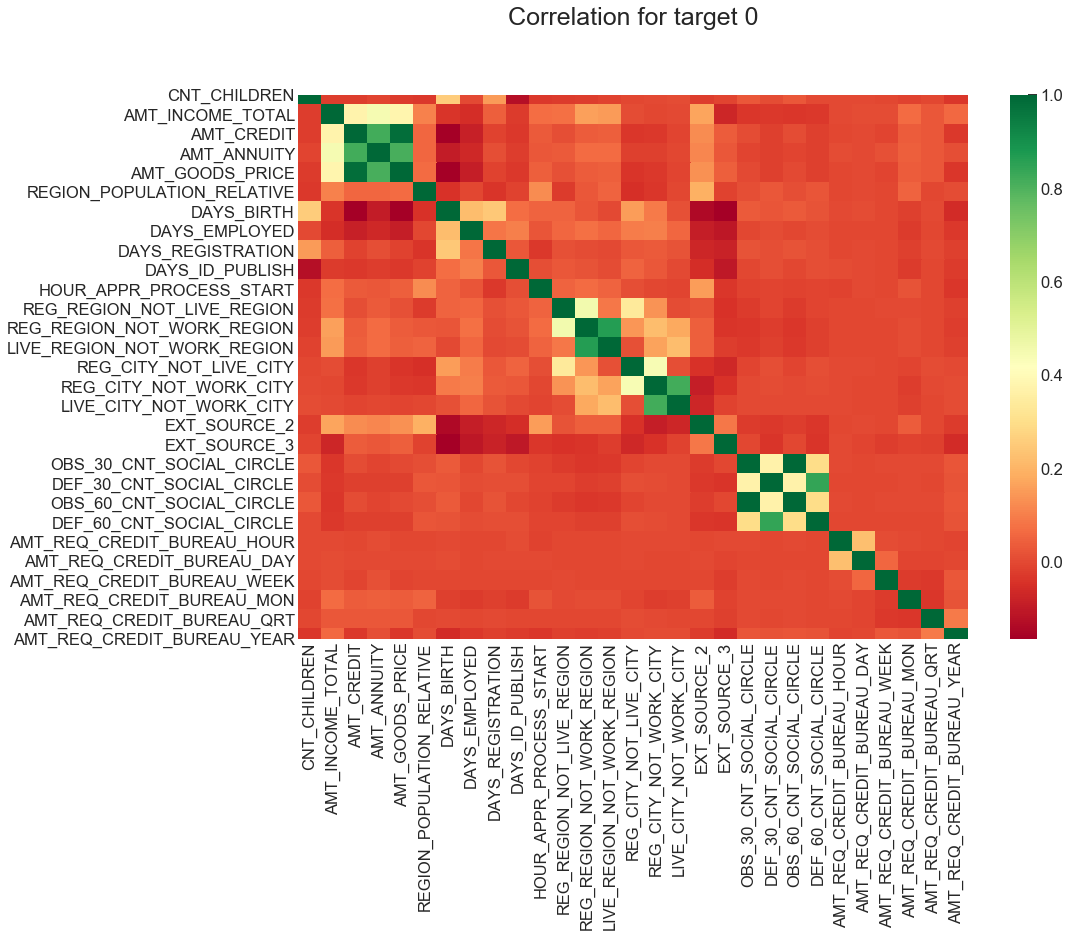

In [195]:
# For Target 0
targets_corr(data=target0,title='Correlation for target 0')

**As we can see from above correlation heatmap, There are number of observation we can point out**

1. Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.
2. Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.
3. Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.
4. less children client have in densely populated area.
5. Credit amount is higher to densely populated area.
6. The income is also higher in densely populated area.

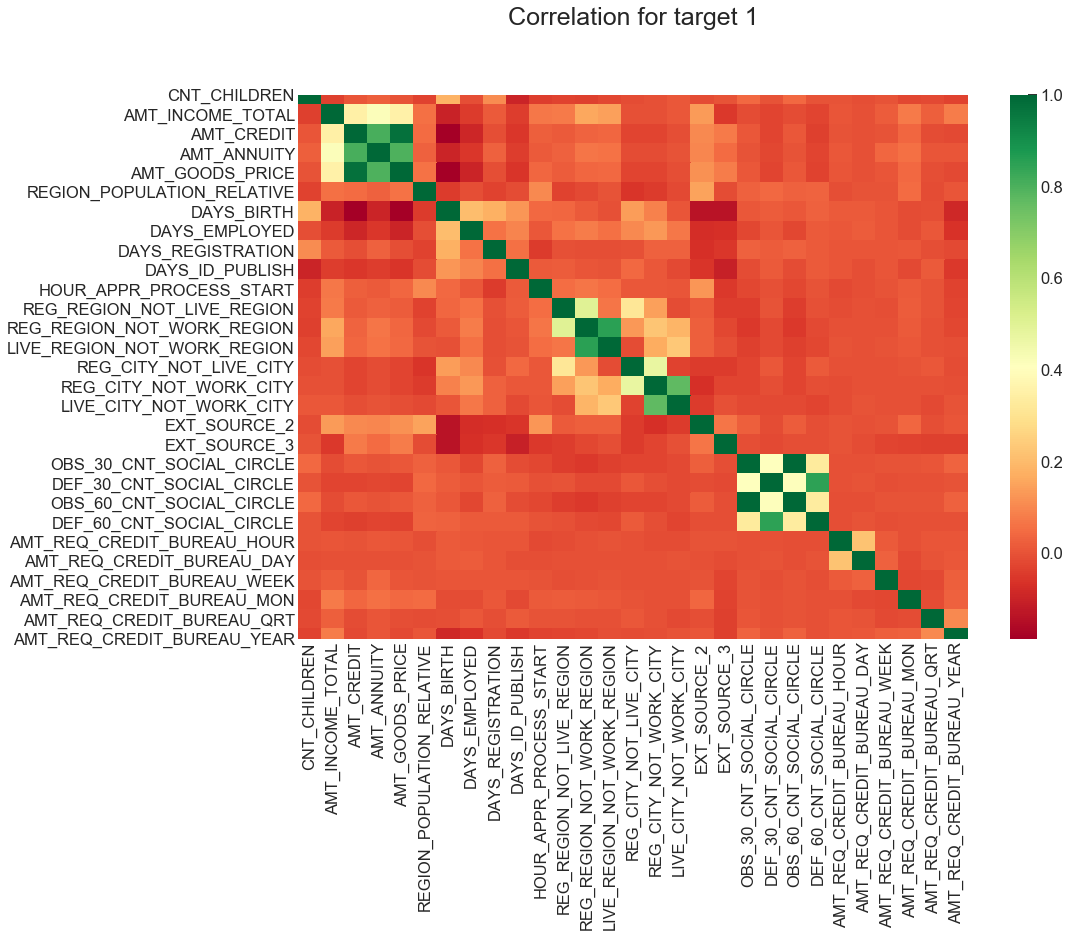

In [196]:
# For Target 1
targets_corr(data=target1,title='Correlation for target 1')

**This heat map for Target 1 is also having quite a same observation just like Target 0. But for few points are different. They are listed below.**

1. The client's permanent address does not match contact address are having less children and vice-versa
2. the client's permanent address does not match work address are having less children and vice-versa

**Visualising Univariate analysis for variables**

In [197]:
# Box plotting for univariate variables analysis in logarithmic scale
def univariate_numerical(data,col,title):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data =target1_df, x=col,orient='v')
    plt.show()
    

**Finding any outliers for Target 0/1** 

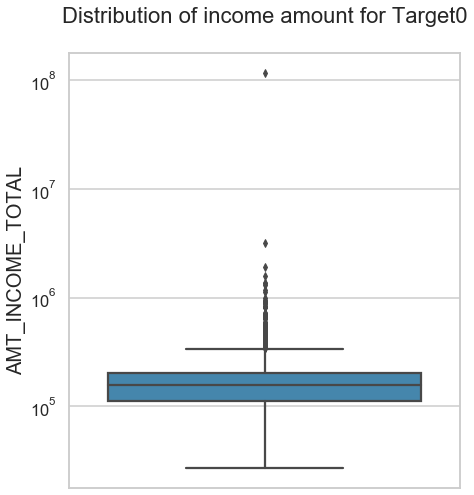

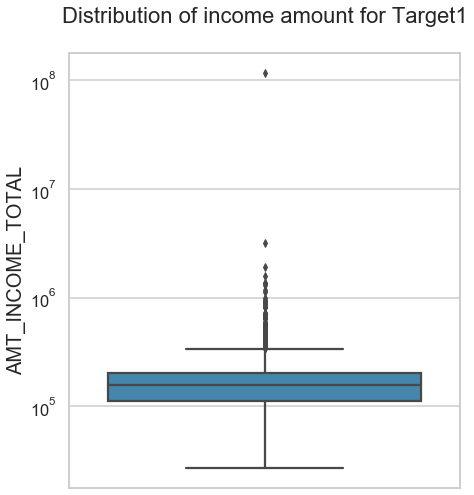

In [198]:
# Distribution of income amount
univariate_numerical(data=target0_df,col='AMT_INCOME_TOTAL',title='Distribution of income amount for Target0')
univariate_numerical(data=target1_df,col='AMT_INCOME_TOTAL',title='Distribution of income amount for Target1')

**Few points can be concluded from the graph above for Target 0.**

1. Some outliers are noticed in income amount.
2. The third quartiles is very slim for income amount.

**Few points can be concluded from the graph above for Target 1.**

1. Some outliers are noticed in income amount.
2. The third quartiles is very slim for income amount.
3. Most of the clients of income are present in first quartile.


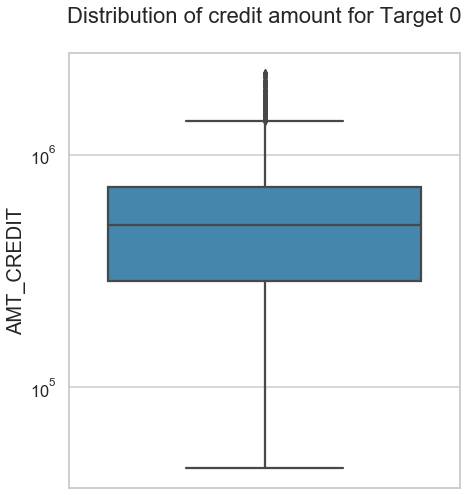

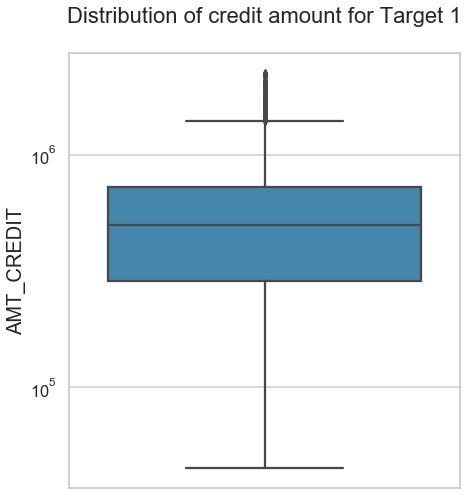

In [199]:
# Disrtibution of credit amount
univariate_numerical(data=target0_df,col='AMT_CREDIT',title='Distribution of credit amount for Target 0')
univariate_numerical(data=target1_df,col='AMT_CREDIT',title='Distribution of credit amount for Target 1')

**Few points can be concluded from the graph above.**

1. Some outliers are noticed in credit amount.
2. The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.


---

**Bivariate analysis for numerical variables**

**For Target 0**

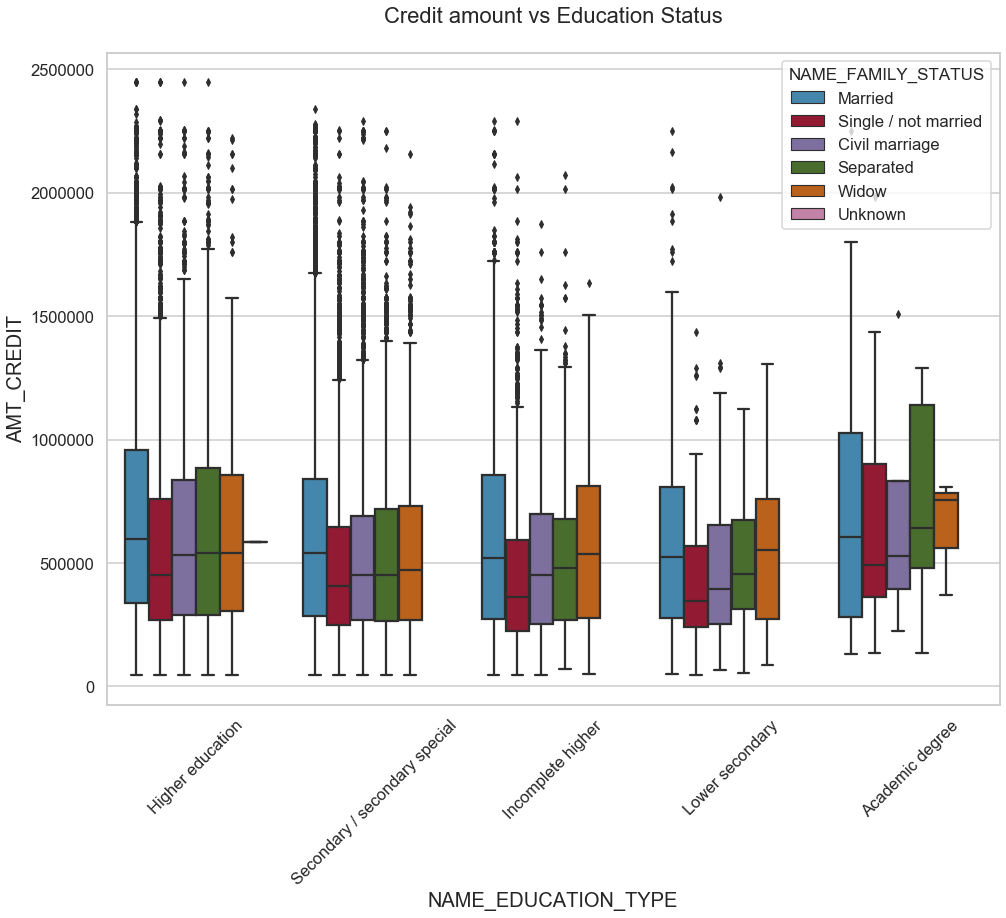

In [200]:
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

From the above box plot we can conclude that Family status of 'civil marriage', 'married' and 'separated' of Academic degree education are having higher number of credits than others.
Also, higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers.
Civil marriage for Academic degree is having most of the credits in the third quartile.

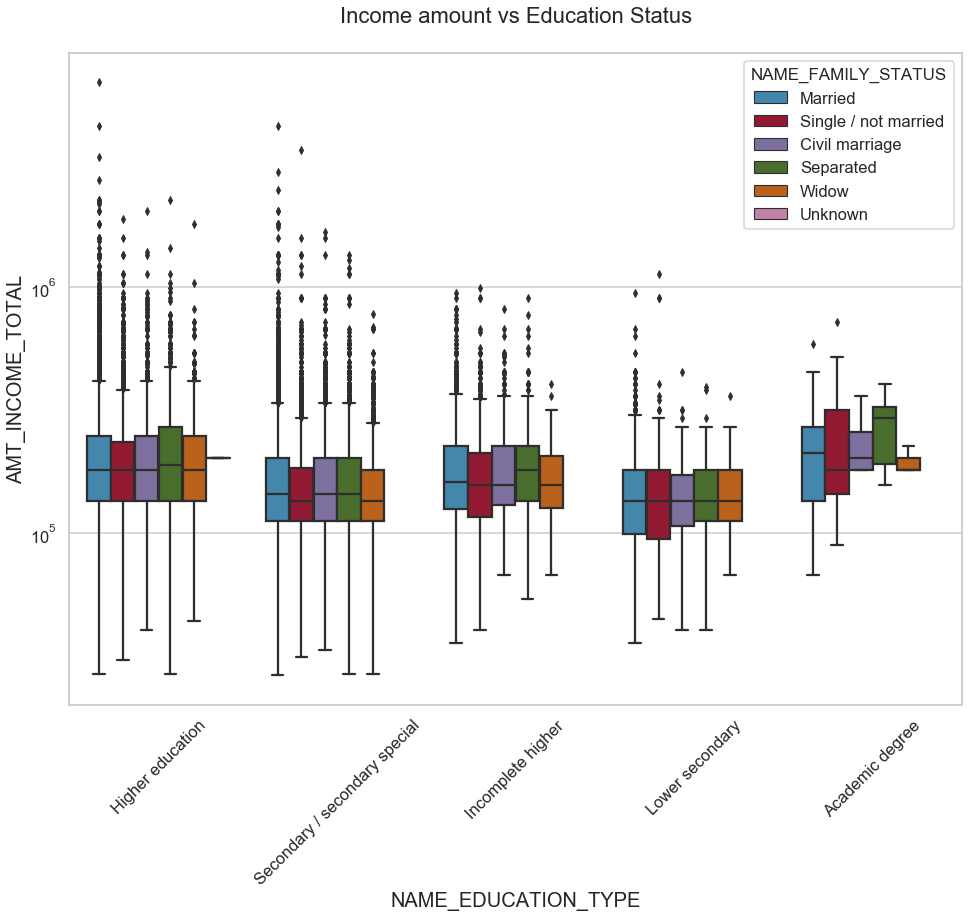

In [201]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers.                                                                                       
Less outlier are having for Academic degree but there income amount is little higher that Higher education.
Lower secondary of civil marriage family status are have less income amount than others.

**For Target 1**

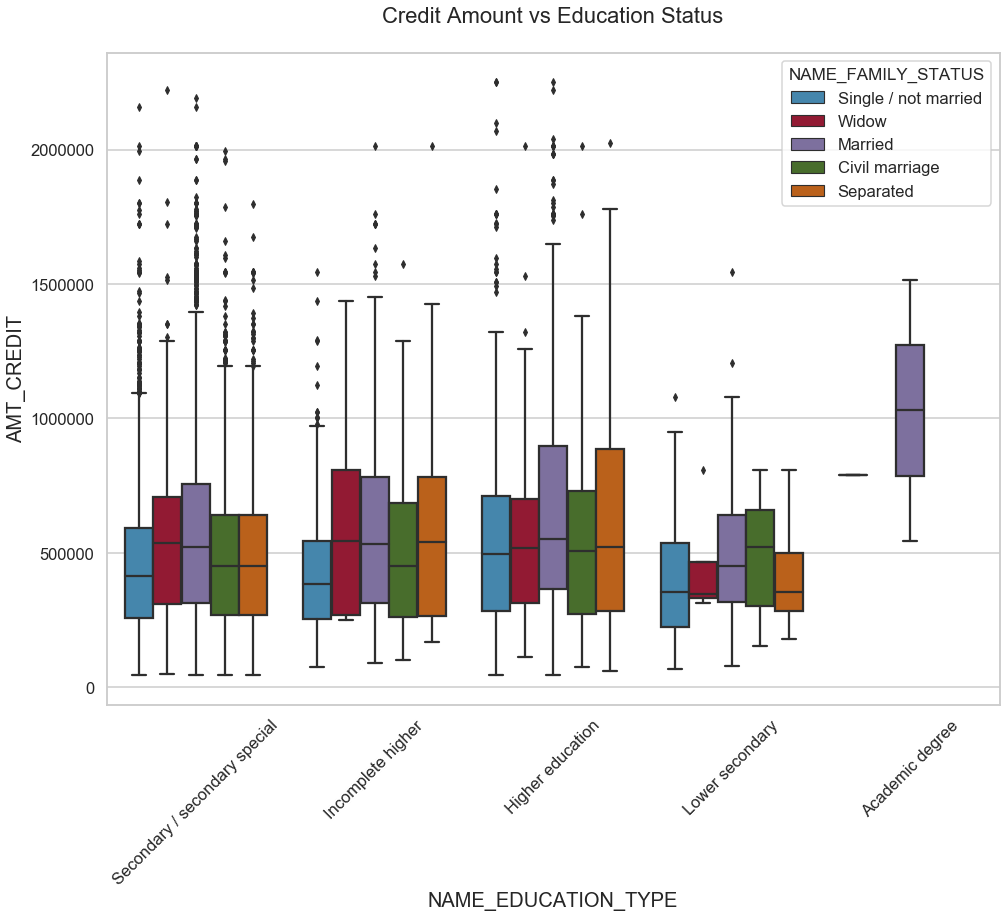

In [202]:
# Box plotting for credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target1_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

Quite similar with Target 0
From the above box plot we can say that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Most of the outliers are from Education type 'Higher education' and 'Secondary'.
Civil marriage for Academic degree is having most of the credits in the third quartile.

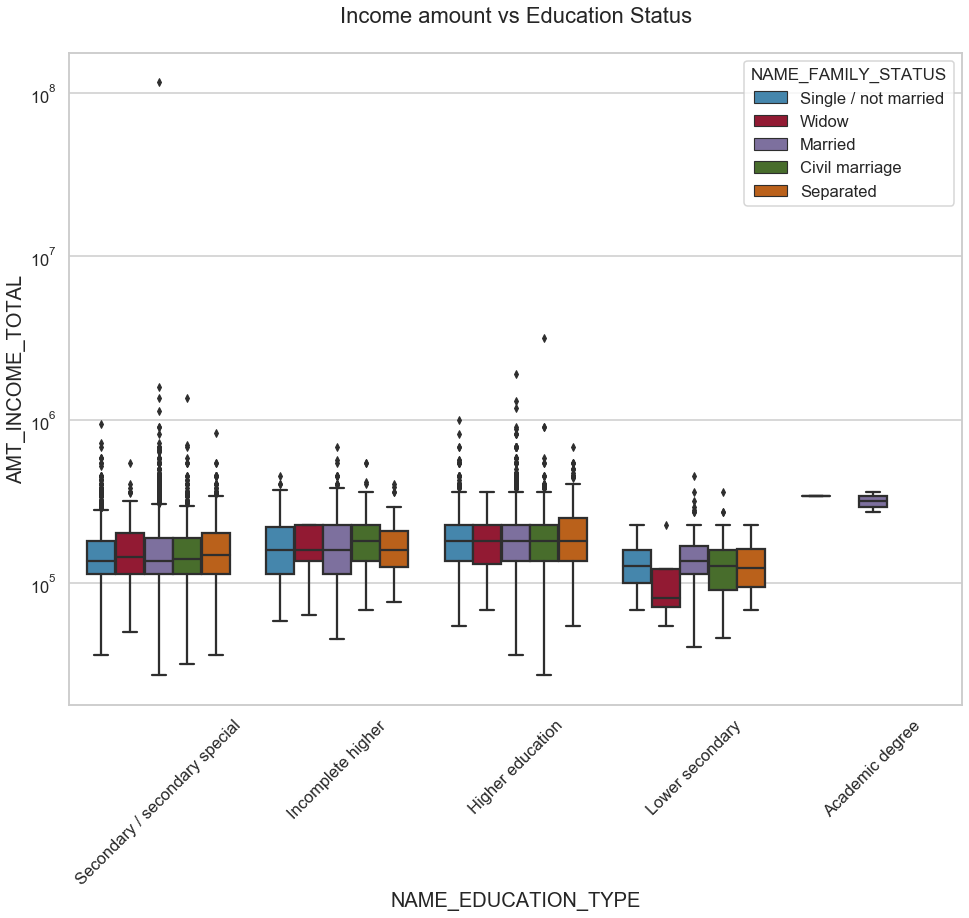

In [203]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target1_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

Have some similarity with Target0,
From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. Less outlier are having for Academic degree but there income amount is little higher that Higher education.
Lower secondary are have less income amount than others.

In [204]:
prev_application = pd.read_csv("previous_application.csv")
prev_application.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
round(100*prev_application.isnull().sum()/len(prev_application.index),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [206]:
#Before merging the file, we need to make sure it should be clean
#Dropping the columns with more than 30% missing NULL as including them could lead to inaccurate results
drop_cols = prev_application.columns[prev_application.isnull().sum()/len(df.index) > 0.3]
drop_cols
prev_application = prev_application.drop(drop_cols,axis=1)

In [207]:
round(100*prev_application.isnull().sum()/len(prev_application.index),2)

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY           0.00
NAME_YIELD_GROUP               0.00
PRODUCT_COMBINATION            0.02
dtype: float64

In [208]:
#Column PRODUCT_COMBINATION has some NULLs
prev_application['PRODUCT_COMBINATION'].isnull().sum()

346

In [209]:
#Replacing cells with NULLs with most frequent value Cash
prev_application['PRODUCT_COMBINATION'] = prev_application['PRODUCT_COMBINATION'].fillna('Cash')

##### We are good to merge the 2 dataframes now

In [249]:
new_df = pd.merge(df,prev_application,on='SK_ID_CURR')

In [250]:
# Renaming the column names after merging
new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [251]:
# Removing unwanted columns for analysis
new_df1.drop(['SK_ID_CURR','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
              'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

**Performing univariate analysis**

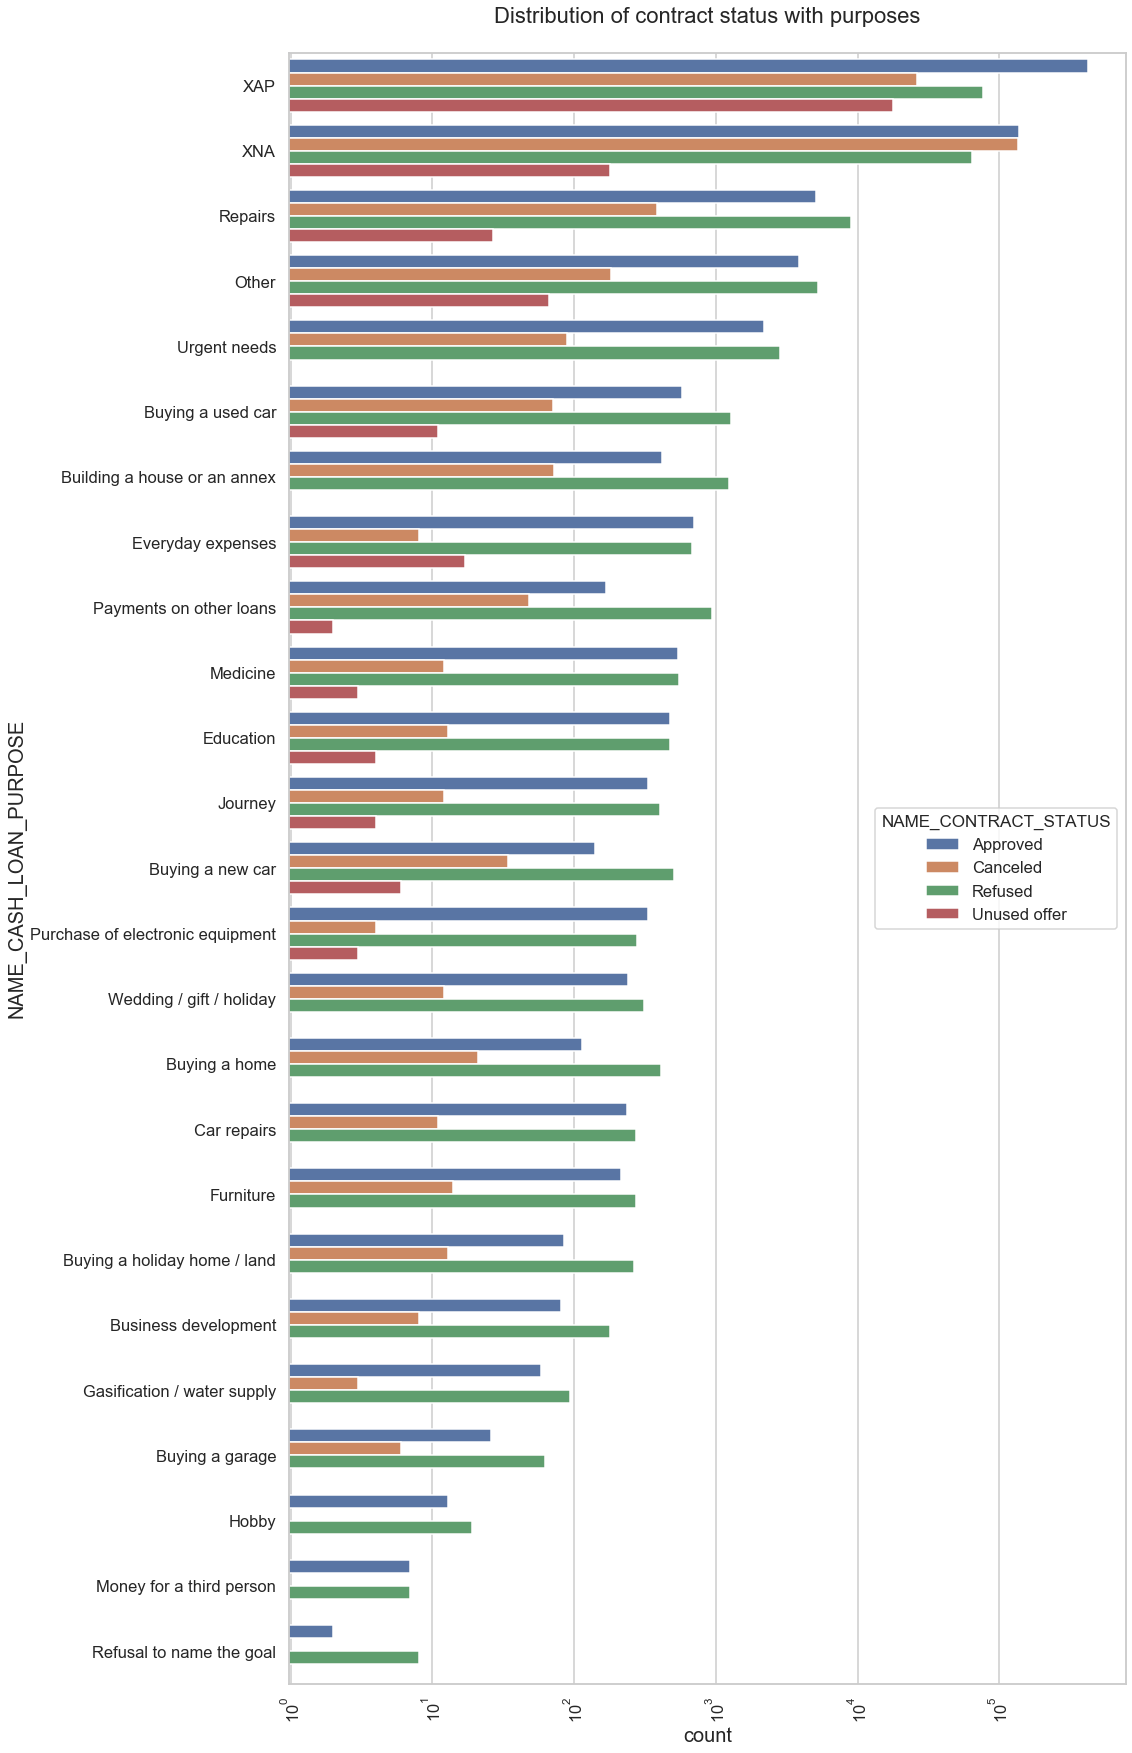

In [252]:
# Distribution of contract status in logarithmic scale
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='deep') 

**Points to be concluded from above plot:**

1. Most rejection of loans came from purpose 'repairs'.
2. For education purposes we have equal number of approves and rejection
3. Payign other loans and buying a new car is having significant higher rejection than approves.

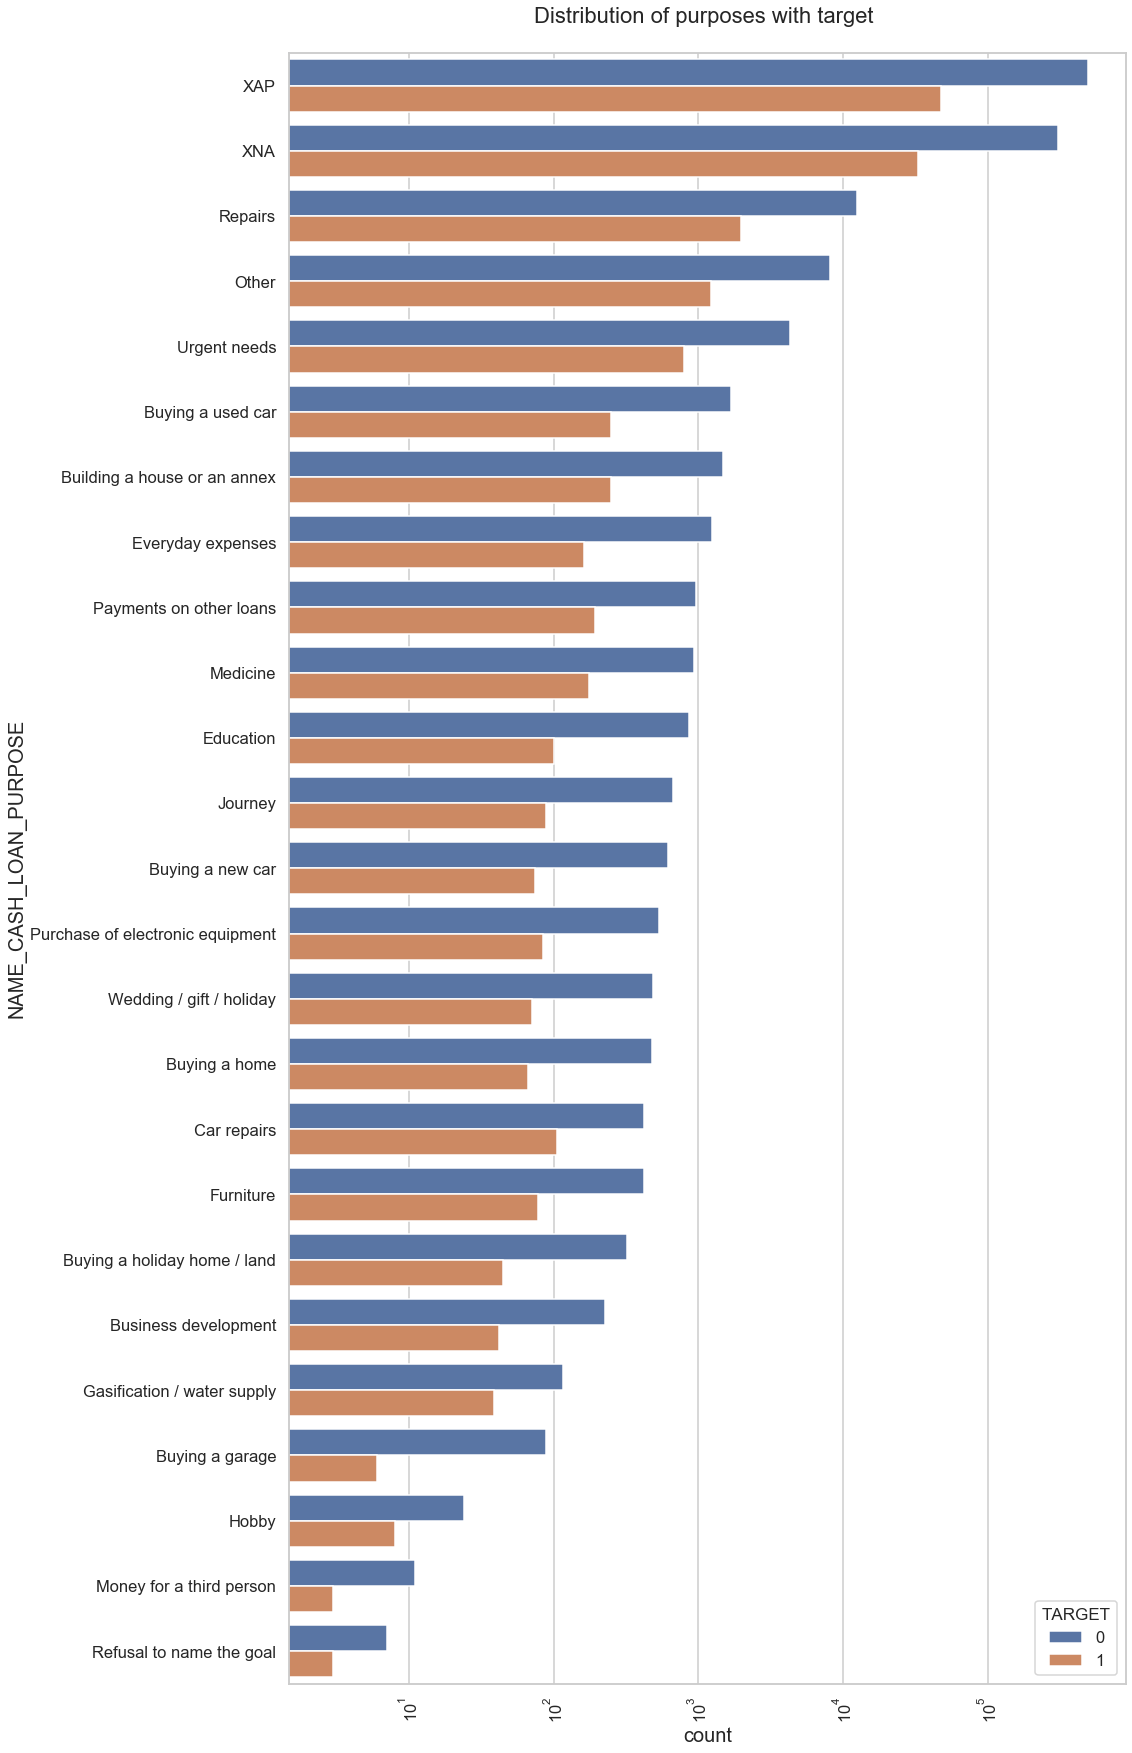

In [253]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='deep') 

**Few points we can conclude from above plot:**

1. Loan purposes with 'Repairs' are facing more difficulites in payment on time.
2. There are few places where loan payment is significant higher than facing difficulties.
    They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education'
Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

**Performing bivariate analysis**

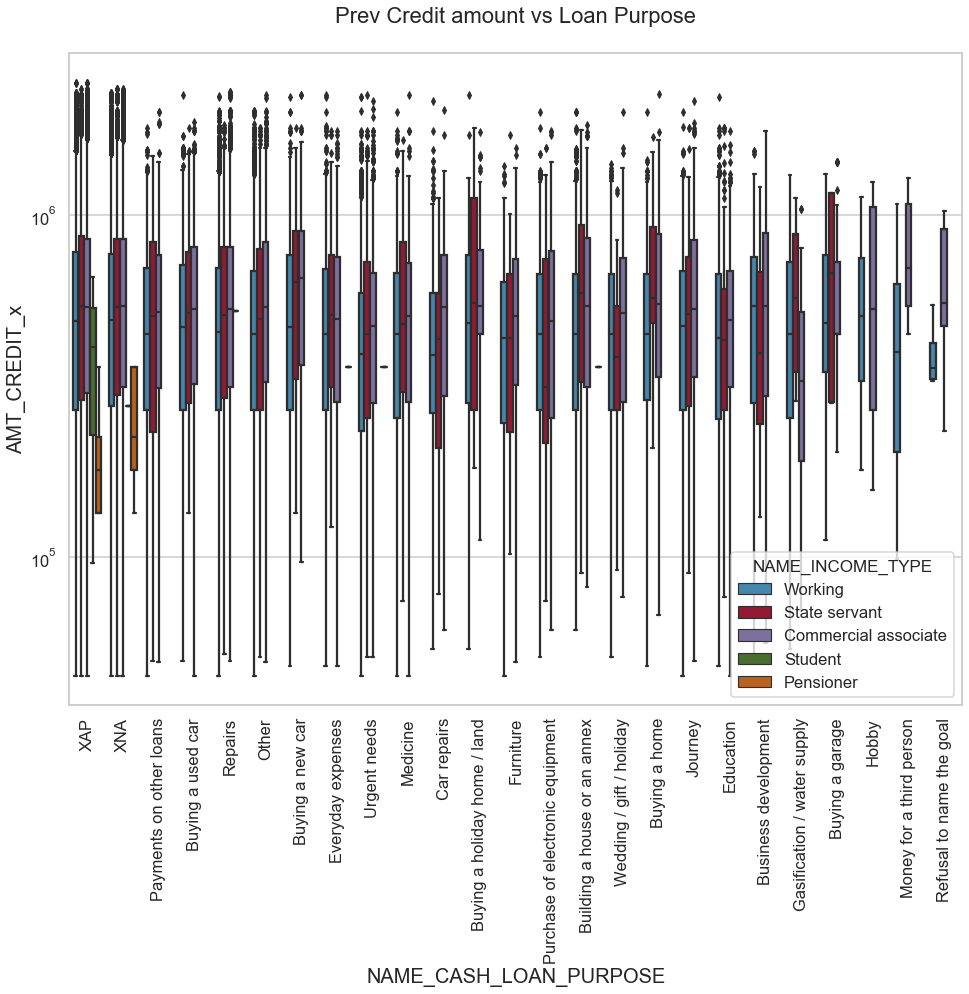

In [254]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =new_df1, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_x',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

**From the above we can conclude some points-**

1. The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
2. Income type of state servants have a significant amount of credit applied
3. Money for third person or a Hobby is having less credits applied for.

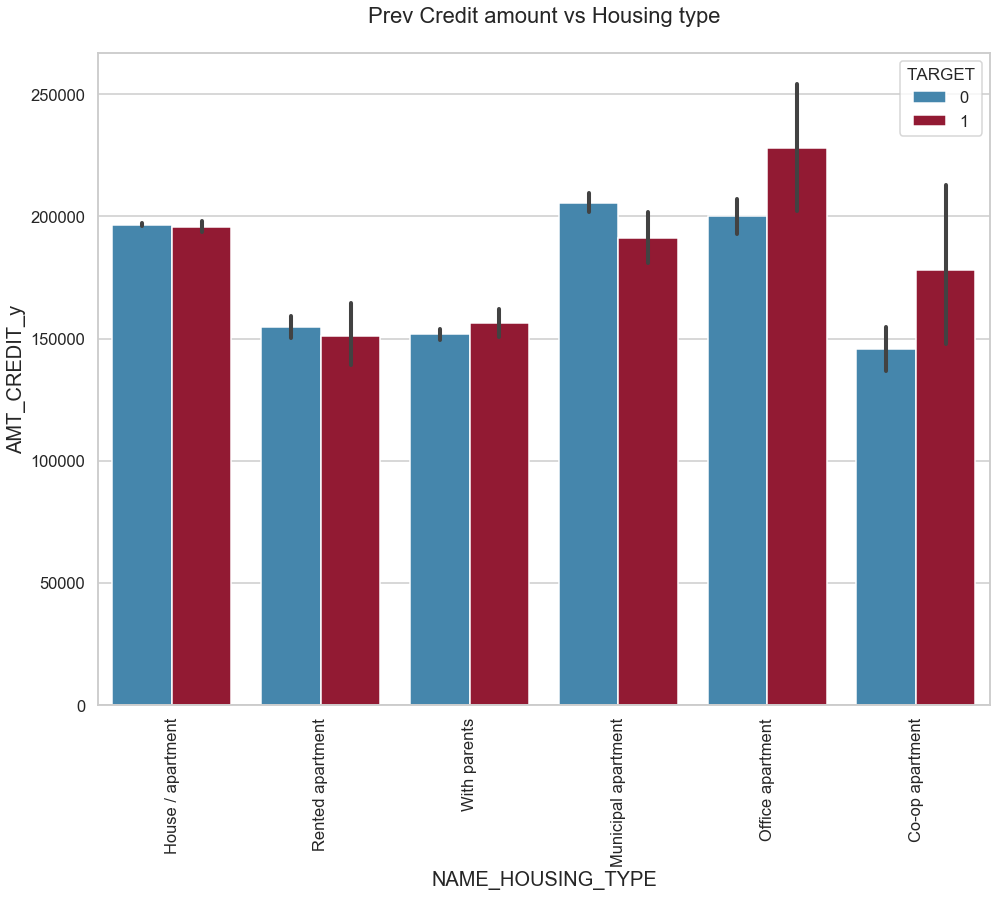

In [255]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_df1, y='AMT_CREDIT_y',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Here for Housing type, office appartment is having higher credit of target 1 and co-op apartment is having higher credit of target 1.

So, we can conclude that bank should avoid giving loans to the housing type of co-op apartmentand also office apartments as they are having difficulties in payment.

Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment or Rented apartment for successful payments.

# Conclusion

We should target people following the below category- 

1)Married with 0/1 children or Single
2)Living in Apartment/House                                                                          
3)Young People                                                                                                                 
4)High Income                                                                                                          
5)People that gave loan earlier on time                                                                           
6)Level of highest education the client achieved is Secondary/Secondary Special                                                 
7)Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application as Cash Loan                         
8)If Gender of Client is female                                                                                          

-->Credit amount is higher for low age and vice-versa                                                                          
-->Credit amount is higher for less children count client have and vice-versa                                               
-->Credit amount of Loan purposes like 'Buying a home', 'Buying a land', 'Buying a new car' and 'Building a house' is higher.   
-->Bank should avoid giving loans to the housing type of co-op apartment and also office apartments as they are having      difficulties in payment.                                                                             
-->Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.                 